# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv('craftcans.csv', na_values=['Does not apply'])

In [3]:
df.head(5)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      2416 non-null   object 
 1   Brewery   2410 non-null   object 
 2   Location  2410 non-null   object 
 3   Style     2405 non-null   object 
 4   Size      2410 non-null   object 
 5   ABV       2348 non-null   object 
 6   IBUs      1405 non-null   float64
dtypes: float64(1), object(6)
memory usage: 132.2+ KB


In [5]:
df.describe()

,IBUs
count,1405.000000
mean,42.713167
std,25.954066
min,4.000000
25%,21.000000
50%,35.000000
75%,64.000000
max,138.000000


# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [6]:
df.Beer.sort_values(ascending = False).head(10)

928     the Kimmie, the Yink and the Holy Gose
1651                         oSKAr the G'Rauch
1650                         oSKAr the G'Rauch
1981                              Zonker Stout
930                              Zombie Monkie
740                                        Zen
1931                             Zaison (2012)
1386                                    Zaison
1065                           Yunkin' Punkin'
865                        You're My Boy, Blue
Name: Beer, dtype: object

## What is the most common ABV? (alcohol by volume)

In [7]:
df.ABV.mode()

0    5.00%
dtype: object

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [8]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [9]:
df.ABV = df.ABV.str.replace("%", "")

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [10]:
df.ABV = df.ABV.astype(float)

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [11]:
df.ABV.describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

<AxesSubplot:title={'center':'ABV Frequency'}, ylabel='Frequency'>

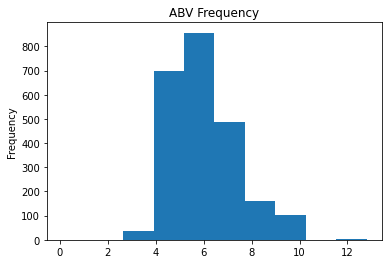

In [12]:
df.ABV.plot(kind = 'hist', title = 'ABV Frequency')

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [13]:
df.ABV.isnull().value_counts()

False    2348
True       68
Name: ABV, dtype: int64

In [14]:
df.ABV.isnull().sum()

68

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [15]:
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [16]:
df[df.Location == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [17]:
df[df.Location == 'Brooklyn, NY'].Brewery.value_counts().head(1)

Sixpoint Craft Ales    24
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [18]:
df.Style.value_counts().head(5)

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [19]:
df.shape

(2416, 7)

In [20]:
state_brew = df.dropna(subset=['Location'])
# pd.set_option("display.max_rows", 600)
state_brew[state_brew.Location.str.contains('NY', case = False)]


,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,NaN
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,NaN
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,NaN


### Now *count* all of the breweries in New York state

In [21]:
state_brew = state_brew[state_brew.Location.str.contains('NY', case = False)]

In [22]:
state_brew.groupby(['Brewery']).size().count()

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [23]:
df = df.dropna(subset=['Style'])

In [24]:
ipas = df[df.Style.str.contains('ipa', case = False)]
# pd.set_option("display.max_rows", 600)
ipas

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [25]:
df.IBUs.mean()

42.73984319315752

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [26]:
# pd.set_option("display.max_rows", 100)
df.IBUs.mean()


42.73984319315752

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

Text(0, 0.5, 'Frequency')

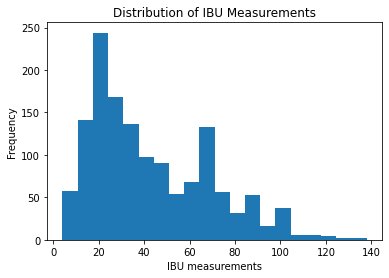

In [27]:
plt.hist(df.IBUs, bins = 20)
plt.title("Distribution of IBU Measurements")
plt.xlabel('IBU measurements')
plt.ylabel('Frequency')


## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [28]:
df.IBUs.describe()


count    1403.000000
mean       42.739843
std        25.962692
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [29]:
high_ibu = df[df.IBUs > df.IBUs.quantile(.75)]
high_ibu

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0


## List all of the beers with IBUs below the 25th percentile

In [30]:
low_ibu = df[df.IBUs < ipas.IBUs.quantile(.25)]
low_ibu

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0
...,...,...,...,...,...,...,...
2405,CynicAle,Surly Brewing Company,"Brooklyn Center, MN",Saison / Farmhouse Ale,16 oz.,6.7,33.0
2407,Monk's Blood,21st Amendment Brewery,"San Francisco, CA",Belgian Dark Ale,12 oz.,8.3,35.0
2409,Hell or High Watermelon Wheat,21st Amendment Brewery,"San Francisco, CA",Fruit / Vegetable Beer,12 oz.,4.9,17.0
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.3,35.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

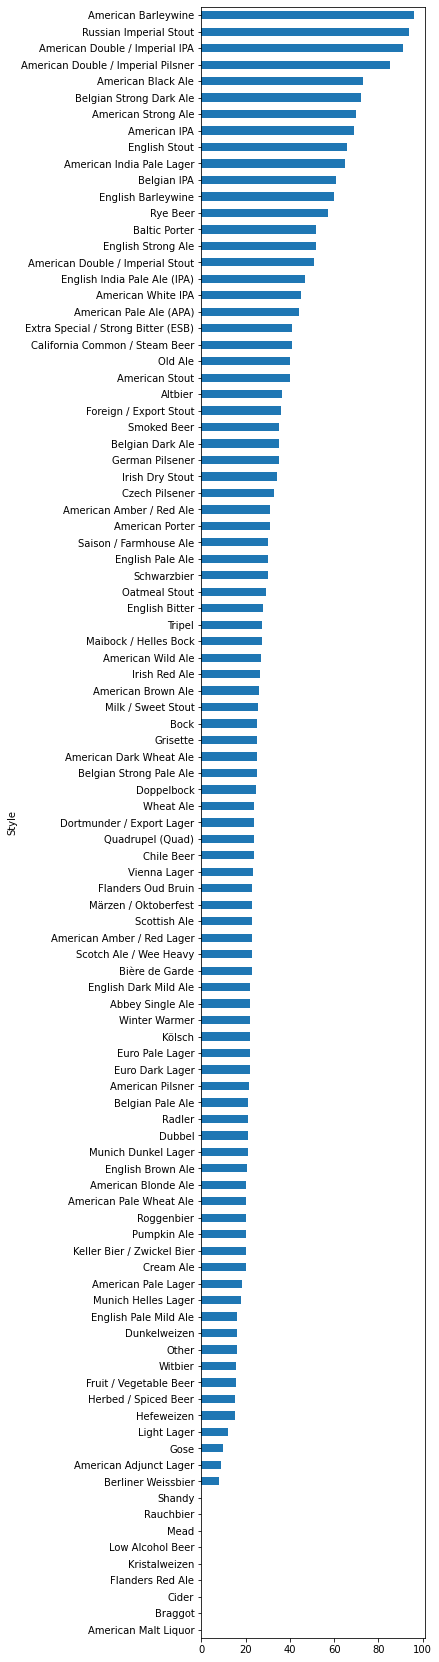

In [31]:
median_ibus = df.groupby(by = 'Style').IBUs.median().sort_values(na_position = 'first')
median_ibus.plot(kind = 'barh', x = 'Style', y = 'IBUs')
median_ibus = df.groupby(by = 'Style').IBUs.median().sort_values(na_position = 'first').plot(kind = 'barh', figsize=(4, 30))

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [32]:
# High IBU
high_ibu.Beer.value_counts().head(5)

Dale's Pale Ale     6
Dagger Falls IPA    3
Modus Hoperandi     2
Heady Topper        2
Citra Ass Down      2
Name: Beer, dtype: int64

In [33]:
# Low IBU
low_ibu.Beer.value_counts().head(5)

Nonstop Hef Hop           12
Longboard Island Lager     4
Boston Lager               3
1327 Pod's ESB             3
CAPT Black IPA             2
Name: Beer, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [34]:
pd.set_option("display.max_rows", 20)

wheat = ["Witbier", "Hefeweizen","American Pale Wheat Ale", "witbier", "hefeweizen","american pale wheat ale"]

df[df.Style.isin(wheat)].IBUs.mean()


18.982142857142858

In [35]:
wheat_beers = df[df.Style.str.contains('|'.join(wheat), case = False)]
wheat_beers.IBUs.mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

Text(0, 0.5, 'Frequency')

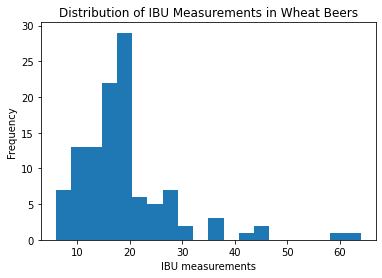

In [36]:
wheat_plot = plt.hist(wheat_beers.IBUs, bins = 20)
plt.title("Distribution of IBU Measurements in Wheat Beers")
plt.xlabel('IBU measurements')
plt.ylabel('Frequency')

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

Text(0, 0.5, 'Frequency')

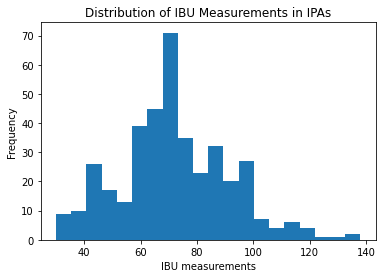

In [37]:
ipa_plot = plt.hist(ipas.IBUs, bins = 20)
plt.title("Distribution of IBU Measurements in IPAs")
plt.xlabel('IBU measurements')
plt.ylabel('Frequency')

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 
(...except totally different)

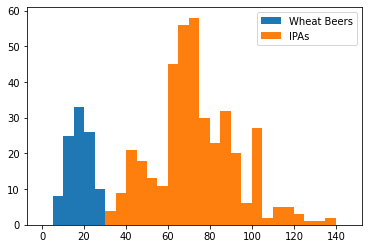

In [38]:
## Can define bins with ranges ((0 or min), (max or just over), bin)

plt.hist(wheat_beers.IBUs, bins = range(0, 150, 5), label='Wheat Beers')
plt.hist(ipas.IBUs, bins = range(0, 150, 5), label= 'IPAs')
plt.legend(loc='upper right')

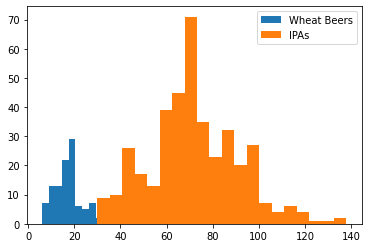

In [39]:
## Can define bins with absolute values
plt.hist(wheat_beers.IBUs, bins = 20, label='Wheat Beers')
plt.hist(ipas.IBUs, bins = 20, label= 'IPAs')
plt.legend(loc='upper right')
plt.show()

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [40]:
wheat_beers.ABV.describe()

count    183.000000
mean       5.043716
std        0.809050
min        3.700000
25%        4.600000
50%        5.000000
75%        5.300000
max        9.200000
Name: ABV, dtype: float64

Text(0, 0.5, 'Frequency')

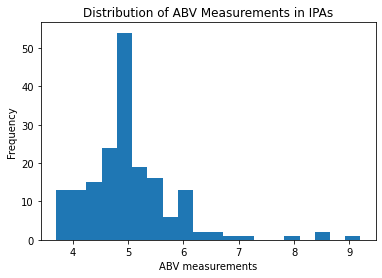

In [41]:
plt.hist(wheat_beers.ABV, bins = 20)
plt.title("Distribution of ABV Measurements in IPAs")
plt.xlabel('ABV measurements')
plt.ylabel('Frequency')

In [42]:
ipas.ABV.describe()

count    560.000000
mean       6.879286
std        1.240232
min        2.700000
25%        6.200000
50%        6.800000
75%        7.500000
max        9.900000
Name: ABV, dtype: float64

Text(0, 0.5, 'Frequency')

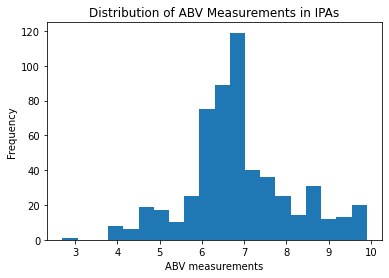

In [43]:
plt.hist(ipas.ABV, bins = 20)
plt.title("Distribution of ABV Measurements in IPAs")
plt.xlabel('ABV measurements')
plt.ylabel('Frequency')

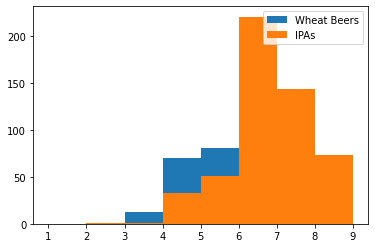

In [44]:
## Can define bins with ranges ((0 or min), (max or just over), bin)

plt.hist(wheat_beers.ABV, bins = range(1, 10, 1), label='Wheat Beers')
plt.hist(ipas.ABV, bins = range(1, 10, 1), label= 'IPAs')
plt.legend(loc='upper right')

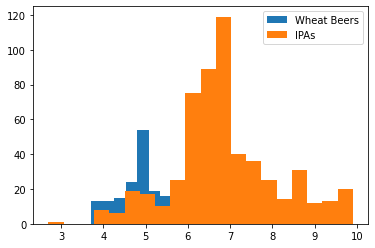

In [45]:
## Can define bins with absolute values
plt.hist(wheat_beers.ABV, bins = 20, label='Wheat Beers')
plt.hist(ipas.ABV, bins = 20, label= 'IPAs')
plt.legend(loc='upper right')
plt.show()

## Good work!

If you made it this far you deserve a drink.